In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns

# Reading in CSV File 

In [2]:
df = pd.read_csv('Train.csv')
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.shape

(8523, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Data Cleaning

In [5]:
# Identifying all null values in the datasets
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
# Replacing null values in 'Item_Weight' with the mean value
df['Item_Weight'].mean()

12.857645184136183

In [7]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

In [8]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
# Replacing null value in 'Outlet_Size' with the mode of each Outlet Type group
# Replacing the missing values in 'Outlet_Size' with mode
mode_df = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [10]:
mode_df

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [11]:
missing_values = df['Outlet_Size'].isnull()
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [12]:
df.loc[missing_values, 'Outlet_Size'] = df.loc[missing_values, 'Outlet_Type'].apply(lambda x: mode_df[x])

In [13]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Data Analysis and Exploration

In [14]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [15]:
df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


### Data Visualization (Categorical)

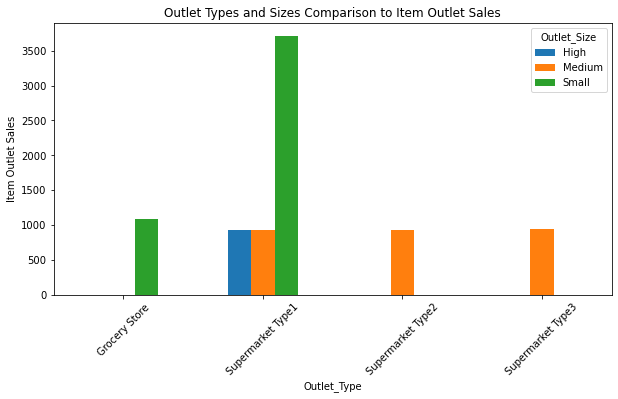

In [16]:
matplotlib.rcParams["figure.figsize"] = (10, 5)
grouped_data = df.groupby(['Outlet_Type', 'Outlet_Size'])['Outlet_Type'].count().unstack('Outlet_Size').plot(kind='bar')
plt.ylabel('Item Outlet Sales')
plt.xticks(rotation=45)
plt.title('Outlet Types and Sizes Comparison to Item Outlet Sales')
plt.show()

The bar chart shows that some 'Outlet_Size' are in some 'Outlet_Type'. The small 'Outlet_Type' is only present in Grocery Store and Supermarket Type 1. In addition, the high 'Outlet_Type' is only present in Supermarket Type 1. However, the medium 'Outlet_Type' is present in all the except the Grocery Store. Medium is more present in different Outlet Type than the other sizes. High is only present in one 'Outlet_Type'.   

In [17]:
df[(df['Outlet_Type'] == 'Grocery Store') & (df['Outlet_Size'] == 'Small')]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
23,FDC37,12.857645,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
28,FDE51,5.925000,Regular,0.161467,Dairy,45.5086,OUT010,1998,Small,Tier 3,Grocery Store,178.4344
29,FDC14,12.857645,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
30,FDV38,19.250000,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,Small,Tier 3,Grocery Store,163.7868
...,...,...,...,...,...,...,...,...,...,...,...,...
8473,DRI47,14.700000,Low Fat,0.035016,Hard Drinks,144.3128,OUT010,1998,Small,Tier 3,Grocery Store,431.4384
8480,FDQ58,12.857645,Low Fat,0.000000,Snack Foods,154.5340,OUT019,1985,Small,Tier 1,Grocery Store,459.4020
8486,FDR20,20.000000,Regular,0.000000,Fruits and Vegetables,46.4744,OUT010,1998,Small,Tier 3,Grocery Store,45.2744
8490,FDU44,12.857645,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [18]:
# grouped_data = df.groupby(['Outlet_Type', 'Outlet_Size'])['Outlet_Type'].size()
# grouped_data

In [19]:
# # Grouped Data in DataFrame
# pd.DataFrame({'count' : df.groupby([ "Outlet_Type", "Outlet_Size"] ).size()}).reset_index()

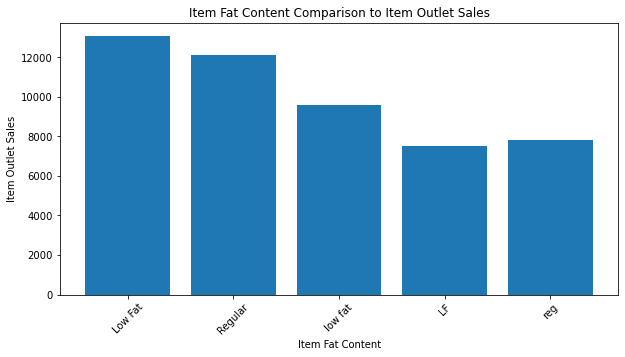

In [20]:
matplotlib.rcParams["figure.figsize"] = (10, 5)
plt.bar(df['Item_Fat_Content'], df['Item_Outlet_Sales'])
plt.ylabel('Item Outlet Sales')
plt.xlabel('Item Fat Content')
plt.xticks(rotation=45)
plt.title('Item Fat Content Comparison to Item Outlet Sales')
plt.show()

# There are errors with the incorrect spelling on several categories

In [21]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [22]:
df.replace({'Item_Fat_Content': {'low fat' : 'Low Fat', 'LF' : 'Low Fat', 'reg' : 'Regular'}}, inplace=True)

In [23]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

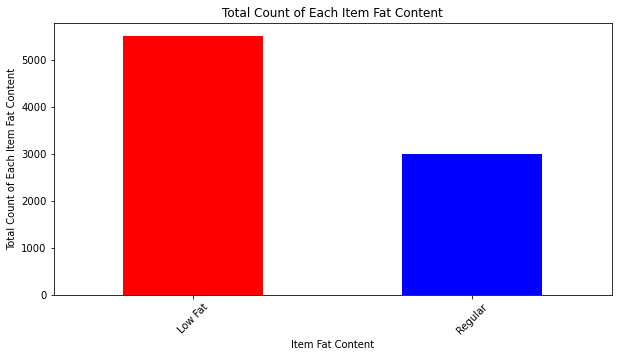

In [24]:
color = ['red', 'blue']

df.groupby('Item_Fat_Content')['Item_Fat_Content'].count().plot(kind='bar', color=color)
plt.ylabel('Total Count of Each Item Fat Content')
plt.xlabel('Item Fat Content')
plt.xticks(rotation=45)
plt.title('Total Count of Each Item Fat Content')
plt.show()

The bar chart shows that there are more low fat items than regular fat items in general. 

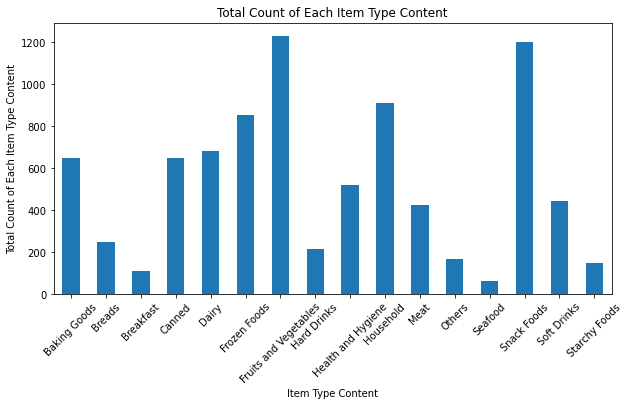

In [25]:
df.groupby('Item_Type')['Item_Type'].count().plot(kind='bar')
plt.ylabel('Total Count of Each Item Type Content')
plt.xlabel('Item Type Content')
plt.xticks(rotation=45)
plt.title('Total Count of Each Item Type Content')
plt.show()

The bar chart shows multiple item types. However, the most common item types are fruits/vegatable, snack foods, and health/hygiene. I believe that are some other item types that can be combined into a single category. 

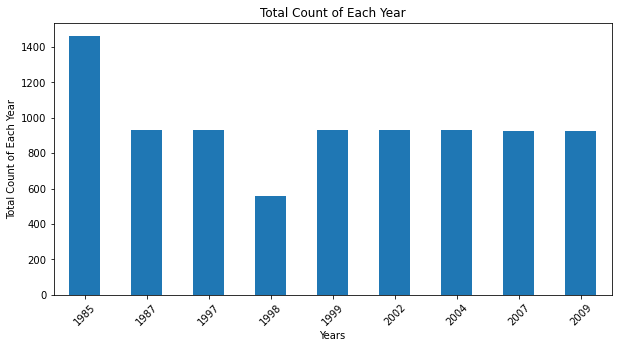

In [26]:
df.groupby('Outlet_Establishment_Year')['Outlet_Establishment_Year'].count().plot(kind='bar')
plt.ylabel('Total Count of Each Year')
plt.xlabel('Years')
plt.xticks(rotation=45)
plt.title('Total Count of Each Year')
plt.show()

The bar charts shows that mainly outlets were established in 1985 and the rest were established equally for the remaining year (except 1998).

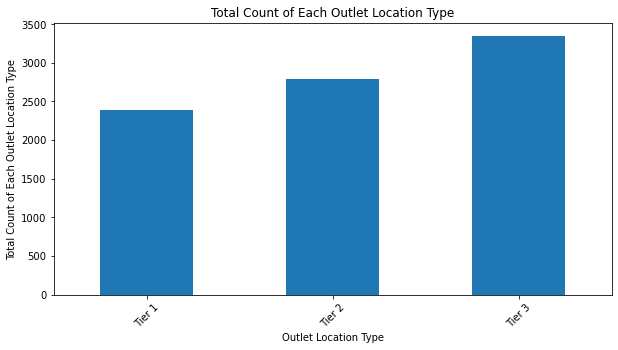

In [27]:
df.groupby('Outlet_Location_Type')['Outlet_Location_Type'].count().plot(kind='bar')
plt.ylabel('Total Count of Each Outlet Location Type')
plt.xlabel('Outlet Location Type')
plt.xticks(rotation=45)
plt.title('Total Count of Each Outlet Location Type')
plt.show()

Tier 3 is the highest count while the remaining Tiers are slightly lower Tier 3.

### Data Visualization (Numerical)

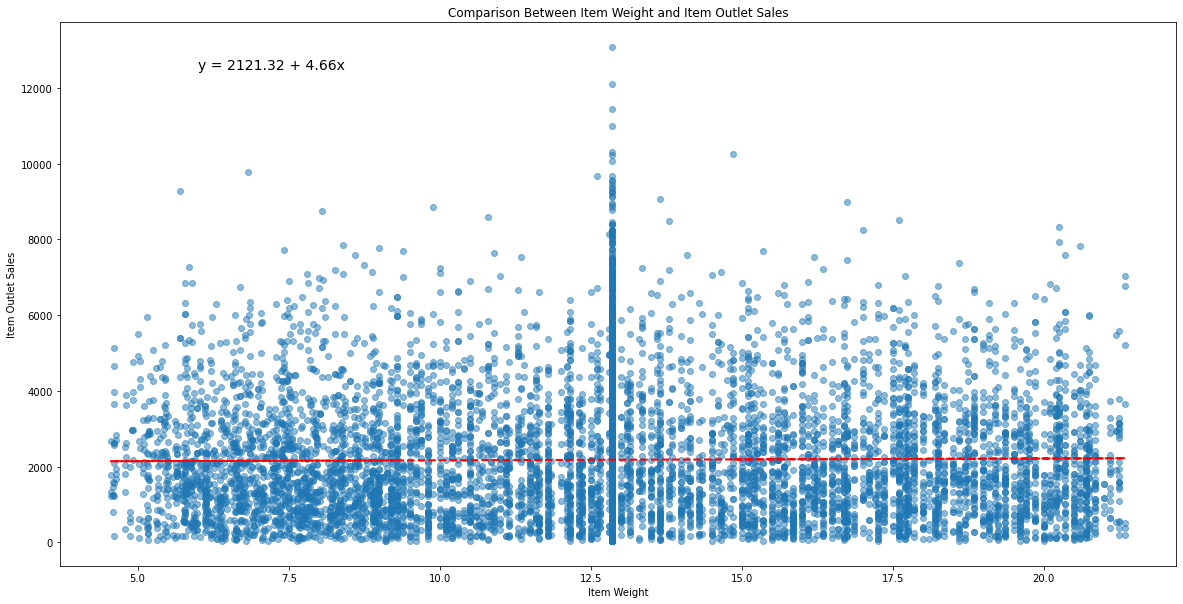

In [28]:
matplotlib.rcParams["figure.figsize"] = (20, 10)
x = df['Item_Weight']
y = df['Item_Outlet_Sales']
a, b = np.polyfit(x, y, 1)
plt.scatter(x, y, alpha=0.5)
plt.plot(x, a*x+b, color='red', linestyle='--', linewidth=2)
plt.text(6, 12500, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)
plt.xlabel('Item Weight')
plt.ylabel('Item Outlet Sales')
plt.title('Comparison Between Item Weight and Item Outlet Sales')
plt.show()

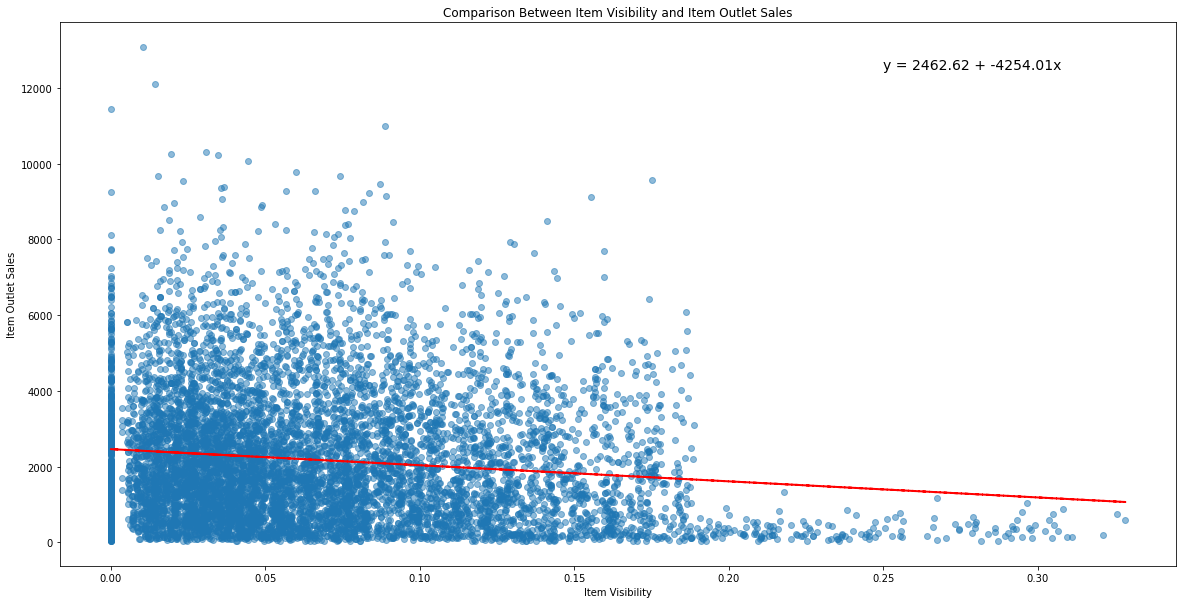

In [29]:
matplotlib.rcParams["figure.figsize"] = (20, 10)
x = df['Item_Visibility']
y = df['Item_Outlet_Sales']
a, b = np.polyfit(x, y, 1)
plt.scatter(x, y, alpha=0.5)
plt.plot(x, a*x+b, color='red', linestyle='--', linewidth=2)
plt.text(0.25, 12500, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)
plt.xlabel('Item Visibility')
plt.ylabel('Item Outlet Sales')
plt.title('Comparison Between Item Visibility and Item Outlet Sales')
plt.show()

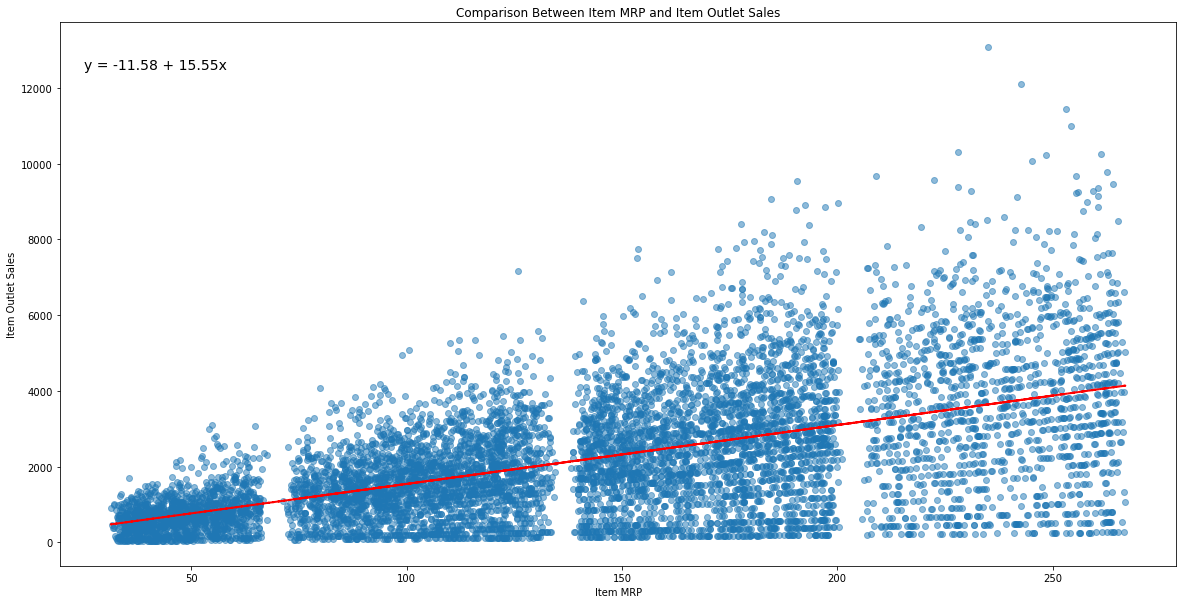

In [30]:
matplotlib.rcParams["figure.figsize"] = (20, 10)
x = df['Item_MRP']
y = df['Item_Outlet_Sales']
a, b = np.polyfit(x, y, 1)
plt.scatter(x, y, alpha=0.5)
plt.plot(x, a*x+b, color='red', linestyle='--', linewidth=2)
plt.text(25, 12500, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.title('Comparison Between Item MRP and Item Outlet Sales')
plt.show()

### Correlation Heat Map 

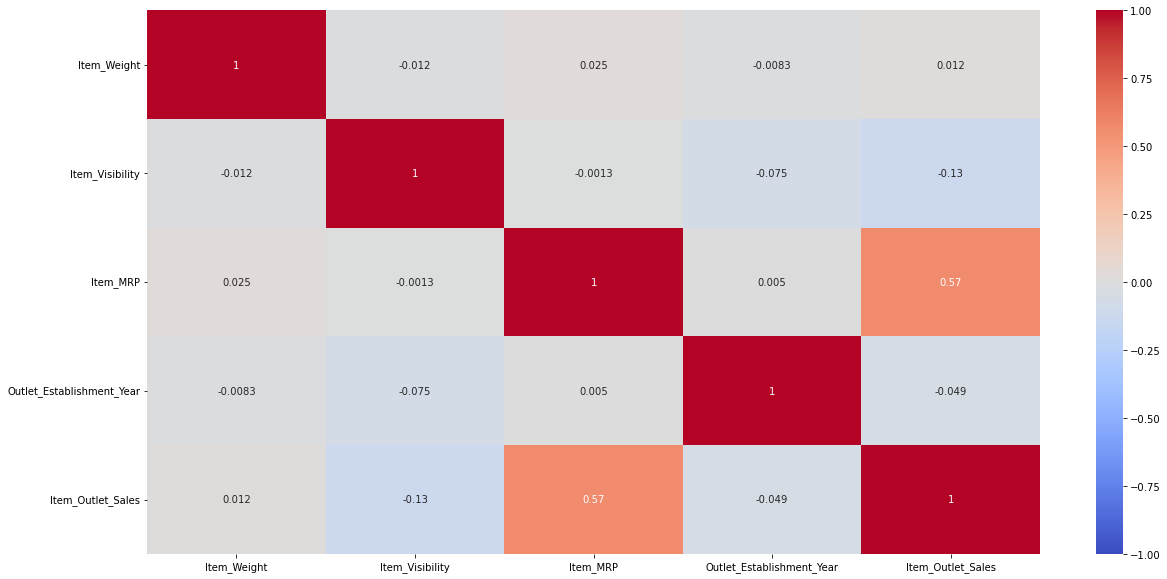

In [31]:
df_corr = df.corr()
sns.heatmap(df_corr, vmin = -1, vmax = 1, annot = True, cmap = 'coolwarm');

# Preprocessing

In [32]:
# Making a copy of the original dataframe
df_copy = df.copy()
df_copy.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


### Label Encoding

In [33]:
# Binary Encoding
df_copy.replace({'Item_Fat_Content': {'Low Fat' : 0, 'Regular' : 1}}, inplace=True)

In [34]:
# Ordinal Encoding
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df_copy['Outlet_Size'] = encoder.fit_transform(df_copy['Outlet_Size'])
df_copy['Outlet_Location_Type'] = encoder.fit_transform(df_copy['Outlet_Location_Type'])

In [35]:
# One Hot Encoding
dummies = pd.get_dummies(df_copy, columns= ['Item_Type', 'Outlet_Type'])
dummies

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.300,0,0.016047,249.8092,OUT049,1999,1,0,3735.1380,...,0,0,0,0,0,0,0,1,0,0
1,DRC01,5.920,1,0.019278,48.2692,OUT018,2009,1,2,443.4228,...,0,0,0,0,1,0,0,0,1,0
2,FDN15,17.500,0,0.016760,141.6180,OUT049,1999,1,0,2097.2700,...,1,0,0,0,0,0,0,1,0,0
3,FDX07,19.200,1,0.000000,182.0950,OUT010,1998,2,2,732.3800,...,0,0,0,0,0,0,1,0,0,0
4,NCD19,8.930,0,0.000000,53.8614,OUT013,1987,0,2,994.7052,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,0.056783,214.5218,OUT013,1987,0,2,2778.3834,...,0,0,0,1,0,0,0,1,0,0
8519,FDS36,8.380,1,0.046982,108.1570,OUT045,2002,2,1,549.2850,...,0,0,0,0,0,0,0,1,0,0
8520,NCJ29,10.600,0,0.035186,85.1224,OUT035,2004,2,1,1193.1136,...,0,0,0,0,0,0,0,1,0,0
8521,FDN46,7.210,1,0.145221,103.1332,OUT018,2009,1,2,1845.5976,...,0,0,0,1,0,0,0,0,1,0


### Splitting Features and Target

In [36]:
new_df = dummies.drop(['Item_Identifier', 'Outlet_Identifier'], axis='columns')
new_df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0,0.016047,249.8092,1999,1,0,3735.1380,0,0,...,0,0,0,0,0,0,0,1,0,0
1,5.920,1,0.019278,48.2692,2009,1,2,443.4228,0,0,...,0,0,0,0,1,0,0,0,1,0
2,17.500,0,0.016760,141.6180,1999,1,0,2097.2700,0,0,...,1,0,0,0,0,0,0,1,0,0
3,19.200,1,0.000000,182.0950,1998,2,2,732.3800,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8.930,0,0.000000,53.8614,1987,0,2,994.7052,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,214.5218,1987,0,2,2778.3834,0,0,...,0,0,0,1,0,0,0,1,0,0
8519,8.380,1,0.046982,108.1570,2002,2,1,549.2850,1,0,...,0,0,0,0,0,0,0,1,0,0
8520,10.600,0,0.035186,85.1224,2004,2,1,1193.1136,0,0,...,0,0,0,0,0,0,0,1,0,0
8521,7.210,1,0.145221,103.1332,2009,1,2,1845.5976,0,0,...,0,0,0,1,0,0,0,0,1,0


In [37]:
X = new_df.drop(['Item_Outlet_Sales'], axis='columns')
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0,0.016047,249.8092,1999,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,5.920,1,0.019278,48.2692,2009,1,2,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,17.500,0,0.016760,141.6180,1999,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,19.200,1,0.000000,182.0950,1998,2,2,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8.930,0,0.000000,53.8614,1987,0,2,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,214.5218,1987,0,2,0,0,0,...,0,0,0,1,0,0,0,1,0,0
8519,8.380,1,0.046982,108.1570,2002,2,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
8520,10.600,0,0.035186,85.1224,2004,2,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8521,7.210,1,0.145221,103.1332,2009,1,2,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [38]:
y = new_df['Item_Outlet_Sales']
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
X_train.shape

(6818, 27)

# Model Building

### Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_test = lin_reg.predict(X_test)
y_pred_train = lin_reg.predict(X_train)

### Metrics for Test Data

In [41]:
from sklearn import metrics

print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred_test))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred_test))

print('R2 Score: ', metrics.r2_score(y_test, y_pred_test))

RMSE:  1123.7417588893386
Mean Absolute Error:  828.4009842015527
Mean Squared Error:  1262795.5406717046
R2 Score:  0.5745888285152643


### Metrics for Training Data

In [42]:
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_train, y_pred_train))

print('Mean Squared Error: ', metrics.mean_squared_error(y_train, y_pred_train))

print('R2 Score: ', metrics.r2_score(y_train, y_pred_train))

RMSE:  1129.8534968683546
Mean Absolute Error:  838.101146418656
Mean Squared Error:  1276568.9243856487
R2 Score:  0.5594182228443406


### Lasso Regression

In [43]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
y_pred_test = lasso_reg.predict(X_test)
y_pred_train = lasso_reg.predict(X_train)

### Metrics for Test Data

In [44]:
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred_test))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred_test))

print('R2 Score: ', metrics.r2_score(y_test, y_pred_test))

RMSE:  1122.5275061625875
Mean Absolute Error:  827.1619106129413
Mean Squared Error:  1260068.0020915978
R2 Score:  0.5755076830291279


### Metrics for Training Data

In [45]:
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_train, y_pred_train))

print('Mean Squared Error: ', metrics.mean_squared_error(y_train, y_pred_train))

print('R2 Score: ', metrics.r2_score(y_train, y_pred_train))

RMSE:  1130.1667691605967
Mean Absolute Error:  838.1658866492871
Mean Squared Error:  1277276.9261149017
R2 Score:  0.5591738704602705


### Support Vector Regression

In [46]:
from sklearn.svm import SVR

svm_reg = SVR()
svm_reg.fit(X_train, y_train)
y_pred_test = svm_reg.predict(X_test)
y_pred_train = svm_reg.predict(X_train)

### Metrics for Test Data

In [47]:
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred_test))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred_test))

print('R2 Score: ', metrics.r2_score(y_test, y_pred_test))

RMSE:  1767.7638228112878
Mean Absolute Error:  1308.161569900404
Mean Squared Error:  3124988.9332403783
R2 Score:  -0.05274778073692632


### Metrics for Training Data

In [48]:
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_train, y_pred_train))

print('Mean Squared Error: ', metrics.mean_squared_error(y_train, y_pred_train))

print('R2 Score: ', metrics.r2_score(y_train, y_pred_train))

RMSE:  1741.126030043727
Mean Absolute Error:  1308.7249119711691
Mean Squared Error:  3031519.8524958296
R2 Score:  -0.04626736448096658


### Decision Tree Regression

In [49]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=12)
tree_reg.fit(X_train, y_train)
y_pred_test = tree_reg.predict(X_test)
y_pred_train = tree_reg.predict(X_train)

### Metrics for Training Data

In [50]:
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_train, y_pred_train))

print('Mean Squared Error: ', metrics.mean_squared_error(y_train, y_pred_train))

print('R2 Score: ', metrics.r2_score(y_train, y_pred_train))

RMSE:  0.0
Mean Absolute Error:  0.0
Mean Squared Error:  0.0
R2 Score:  1.0


### Metrics for Test Data

In [51]:
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred_test))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred_test))

print('R2 Score: ', metrics.r2_score(y_test, y_pred_test))

RMSE:  1508.8175091502494
Mean Absolute Error:  1051.3571652785924
Mean Squared Error:  2276530.275918363
R2 Score:  0.23308138142160628


### Evaluation

The metrics for Lasso Regression minimizes the majority of the metrics.

# Feature Engineering 

In [52]:
f_df = df.copy()
f_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [53]:
f_df.replace({'Item_Type': 
              {'Meat' : 'Meat/Seafood', 
               'Seafood' : 'Meat/Seafood', 
               'Breads' : 'Others',
               'Breakfast' : 'Others',
               'Starchy Foods' : 'Others',
               }}, inplace=True)

In [54]:
f_df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat/Seafood', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Others', 'Health and Hygiene', 'Hard Drinks', 'Canned'],
      dtype=object)

### Labeling Encoding New Dataframe

In [55]:
# Binary Encoding

f_df.replace({'Item_Fat_Content': {'Low Fat' : 0, 'Regular' : 1}}, inplace=True)

In [56]:
# Ordinal Encoding

f_df['Outlet_Size'] = encoder.fit_transform(f_df['Outlet_Size'])
f_df['Outlet_Location_Type'] = encoder.fit_transform(f_df['Outlet_Location_Type'])

In [57]:
# One Hot Encoding

new_dummies = pd.get_dummies(f_df, columns= ['Item_Type', 'Outlet_Type'])
new_dummies

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,...,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat/Seafood,Item_Type_Others,Item_Type_Snack Foods,Item_Type_Soft Drinks,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.300,0,0.016047,249.8092,OUT049,1999,1,0,3735.1380,...,0,0,0,0,0,0,0,1,0,0
1,DRC01,5.920,1,0.019278,48.2692,OUT018,2009,1,2,443.4228,...,0,0,0,0,0,1,0,0,1,0
2,FDN15,17.500,0,0.016760,141.6180,OUT049,1999,1,0,2097.2700,...,0,0,1,0,0,0,0,1,0,0
3,FDX07,19.200,1,0.000000,182.0950,OUT010,1998,2,2,732.3800,...,0,0,0,0,0,0,1,0,0,0
4,NCD19,8.930,0,0.000000,53.8614,OUT013,1987,0,2,994.7052,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,0.056783,214.5218,OUT013,1987,0,2,2778.3834,...,0,0,0,0,1,0,0,1,0,0
8519,FDS36,8.380,1,0.046982,108.1570,OUT045,2002,2,1,549.2850,...,0,0,0,0,0,0,0,1,0,0
8520,NCJ29,10.600,0,0.035186,85.1224,OUT035,2004,2,1,1193.1136,...,1,0,0,0,0,0,0,1,0,0
8521,FDN46,7.210,1,0.145221,103.1332,OUT018,2009,1,2,1845.5976,...,0,0,0,0,1,0,0,0,1,0


### Splitting the Feature and Target Variable

In [58]:
new_X = new_dummies.drop(['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'], axis='columns')
new_X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Type_Baking Goods,Item_Type_Canned,Item_Type_Dairy,...,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat/Seafood,Item_Type_Others,Item_Type_Snack Foods,Item_Type_Soft Drinks,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0,0.016047,249.8092,1999,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,5.920,1,0.019278,48.2692,2009,1,2,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,17.500,0,0.016760,141.6180,1999,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,19.200,1,0.000000,182.0950,1998,2,2,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8.930,0,0.000000,53.8614,1987,0,2,0,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,214.5218,1987,0,2,0,0,0,...,0,0,0,0,1,0,0,1,0,0
8519,8.380,1,0.046982,108.1570,2002,2,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
8520,10.600,0,0.035186,85.1224,2004,2,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
8521,7.210,1,0.145221,103.1332,2009,1,2,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [59]:
new_y = new_dummies['Item_Outlet_Sales']
new_y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

### Splitting the Training Dataset

In [60]:
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.2, random_state=15)
X_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Type_Baking Goods,Item_Type_Canned,Item_Type_Dairy,...,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat/Seafood,Item_Type_Others,Item_Type_Snack Foods,Item_Type_Soft Drinks,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4896,8.365000,1,0.039925,189.2188,2002,2,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11,18.500000,1,0.045464,144.1102,1997,2,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6294,7.825000,0,0.079614,65.0826,2004,2,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
231,12.857645,1,0.139561,170.4764,1985,1,2,0,0,0,...,0,0,1,0,0,0,0,0,0,1
5107,8.880000,0,0.086781,152.2682,1997,2,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6528,12.857645,0,0.027768,82.1592,1985,2,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2693,12.857645,1,0.058543,168.6448,1985,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8076,14.500000,0,0.062239,154.2998,2009,1,2,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3829,20.600000,1,0.000000,178.1344,2004,2,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0


### Linear Regression

In [61]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_test = lin_reg.predict(X_test)
y_pred_train = lin_reg.predict(X_train)

### Metrics for Training Dataset 

In [69]:
lin_train_scores = []

lin_train_scores.append({
    'Name' : 'Linear Regression',
    'rmse_train' : np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)),
    'mae_train' : metrics.mean_absolute_error(y_train, y_pred_train),
    'mse_train' : metrics.mean_squared_error(y_train, y_pred_train),
    'r2_train' : metrics.r2_score(y_train, y_pred_train),
}) 

lin_train_scores_df = pd.DataFrame(lin_train_scores, columns=['Name', 'rmse_train', 'mae_train', 'mse_train', 'r2_train'])
lin_train_scores_df

,Name,rmse_train,mae_train,mse_train,r2_train
0,Linear Regression,1115.842787,829.034029,1.245105e+06,0.560614


### Metrics for Test Dataset 

In [71]:
lin_test_scores = []

lin_test_scores.append({
    'Name' : 'Linear Regression',
    'rmse_test' : np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)),
    'mae_test' : metrics.mean_absolute_error(y_test, y_pred_test),
    'mse_test' : metrics.mean_squared_error(y_test, y_pred_test),
    'r2_test' : metrics.r2_score(y_test, y_pred_test),
}) 

lin_test_scores_df = pd.DataFrame(lin_test_scores, columns=['Name', 'rmse_test', 'mae_test', 'mse_test', 'r2_test'])
lin_test_scores_df

,Name,rmse_test,mae_test,mse_test,r2_test
0,Linear Regression,1179.228725,863.94334,1.390580e+06,0.568611


### Lasso Regression

In [72]:
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
y_pred_test = lasso_reg.predict(X_test)
y_pred_train = lasso_reg.predict(X_train)

### Metrics for Training Dataset

In [73]:
lasso_train_scores = []

lasso_train_scores.append({
    'Name' : 'Lasso Regression',
    'rmse_train' : np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)),
    'mae_train' : metrics.mean_absolute_error(y_train, y_pred_train),
    'mse_train' : metrics.mean_squared_error(y_train, y_pred_train),
    'r2_train' : metrics.r2_score(y_train, y_pred_train),
}) 

lasso_train_scores_df = pd.DataFrame(lasso_train_scores, columns=['Name', 'rmse_train', 'mae_train', 'mse_train', 'r2_train'])
lasso_train_scores_df

,Name,rmse_train,mae_train,mse_train,r2_train
0,Lasso Regression,1116.113161,828.892457,1.245709e+06,0.560401


### Metrics for Test Dataset

In [74]:
lasso_test_scores = []

lasso_test_scores.append({
    'Name' : 'Lasso Regression',
    'rmse_test' : np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)),
    'mae_test' : metrics.mean_absolute_error(y_test, y_pred_test),
    'mse_test' : metrics.mean_squared_error(y_test, y_pred_test),
    'r2_test' : metrics.r2_score(y_test, y_pred_test),
}) 

lasso_test_scores_df = pd.DataFrame(lasso_test_scores, columns=['Name', 'rmse_test', 'mae_test', 'mse_test', 'r2_test'])
lasso_test_scores_df

,Name,rmse_test,mae_test,mse_test,r2_test
0,Lasso Regression,1178.249891,863.283915,1.388273e+06,0.569327


### Support Vector Regression 

In [75]:
from sklearn.svm import SVR

svm_reg = SVR()
svm_reg.fit(X_train, y_train)
y_pred_test = svm_reg.predict(X_test)
y_pred_train = svm_reg.predict(X_train)

### Metrics for Training Data 

In [76]:
sv_train_scores = []

sv_train_scores.append({
    'Name' : 'Support Vector Regression',
    'rmse_train' : np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)),
    'mae_train' : metrics.mean_absolute_error(y_train, y_pred_train),
    'mse_train' : metrics.mean_squared_error(y_train, y_pred_train),
    'r2_train' : metrics.r2_score(y_train, y_pred_train),
}) 

sv_train_scores_df = pd.DataFrame(sv_train_scores, columns=['Name', 'rmse_train', 'mae_train', 'mse_train', 'r2_train'])
sv_train_scores_df

,Name,rmse_train,mae_train,mse_train,r2_train
0,Support Vector Regression,1719.126277,1298.546088,2.955395e+06,-0.042931


### Metrics for Test Data 

In [78]:
sv_test_scores = []

sv_test_scores.append({
    'Name' : 'Support Vector Regression',
    'rmse_test' : np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)),
    'mae_test' : metrics.mean_absolute_error(y_test, y_pred_test),
    'mse_test' : metrics.mean_squared_error(y_test, y_pred_test),
    'r2_test' : metrics.r2_score(y_test, y_pred_test),
}) 

sv_test_scores_df = pd.DataFrame(sv_test_scores, columns=['Name', 'rmse_test', 'mae_test', 'mse_test', 'r2_test'])
sv_test_scores_df

,Name,rmse_test,mae_test,mse_test,r2_test
0,Support Vector Regression,1833.37309,1349.231493,3.361257e+06,-0.042737


### Decision Tree Regression

In [79]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=12)
tree_reg.fit(X_train, y_train)
y_pred_test = tree_reg.predict(X_test)
y_pred_train = tree_reg.predict(X_train)

### Metrics for Training Data

In [81]:
tree_train_scores = []

tree_train_scores.append({
    'Name' : 'Decision Tree Regression',
    'rmse_train' : np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)),
    'mae_train' : metrics.mean_absolute_error(y_train, y_pred_train),
    'mse_train' : metrics.mean_squared_error(y_train, y_pred_train),
    'r2_train' : metrics.r2_score(y_train, y_pred_train),
}) 

tree_train_scores_df = pd.DataFrame(tree_train_scores, columns=['Name', 'rmse_train', 'mae_train', 'mse_train', 'r2_train'])
tree_train_scores_df

,Name,rmse_train,mae_train,mse_train,r2_train
0,Decision Tree Regression,4.769494e-15,1.000471e-16,2.274807e-29,1.0


### Metrics for Test Data 

In [82]:
tree_test_scores = []

tree_test_scores.append({
    'Name' : 'Decision Tree Regression',
    'rmse_test' : np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)),
    'mae_test' : metrics.mean_absolute_error(y_test, y_pred_test),
    'mse_test' : metrics.mean_squared_error(y_test, y_pred_test),
    'r2_test' : metrics.r2_score(y_test, y_pred_test),
}) 

tree_test_scores_df = pd.DataFrame(tree_test_scores, columns=['Name', 'rmse_test', 'mae_test', 'mse_test', 'r2_test'])
tree_test_scores_df

,Name,rmse_test,mae_test,mse_test,r2_test
0,Decision Tree Regression,1628.292713,1118.290176,2.651337e+06,0.177496


In [89]:
training_score = pd.concat([lin_train_scores_df, lasso_train_scores_df, sv_train_scores_df, tree_train_scores_df], axis=0).reset_index()
training_score.drop(['index'], axis='columns')

,Name,rmse_train,mae_train,mse_train,r2_train
0,Linear Regression,1.115843e+03,8.290340e+02,1.245105e+06,0.560614
1,Lasso Regression,1.116113e+03,8.288925e+02,1.245709e+06,0.560401
2,Support Vector Regression,1.719126e+03,1.298546e+03,2.955395e+06,-0.042931
3,Decision Tree Regression,4.769494e-15,1.000471e-16,2.274807e-29,1.000000


In [88]:
test_score = pd.concat([lin_test_scores_df, lasso_test_scores_df, sv_test_scores_df, tree_test_scores_df], axis=0).reset_index()
test_score.drop(['index'], axis='columns')

,Name,rmse_test,mae_test,mse_test,r2_test
0,Linear Regression,1179.228725,863.943340,1.390580e+06,0.568611
1,Lasso Regression,1178.249891,863.283915,1.388273e+06,0.569327
2,Support Vector Regression,1833.373090,1349.231493,3.361257e+06,-0.042737
3,Decision Tree Regression,1628.292713,1118.290176,2.651337e+06,0.177496
